# Titanic Data Exploration
## 1. Problem definition:
- Titanic  is based on the sinking of the ‘Unsinkable’ ship Titanic in the early 1912. The dataset 'train' provides information about multiple passengers, including their ages, sexes, sibling counts, embarkment points and whether or not they survived the disaster. Based on these features, I have tried to predict if an arbitrary passenger on Titanic would survive the sinking

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Raw Dataset "train.csv"

- Categorical features: Survived, Sex, and Embarked. 
- Ordinal Features: Pclass.
- Continous numerical features: Age, Fare. Discrete: SibSp, Parch.
- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

In [3]:
df_train = pd.read_csv('/Users/sabrinafruhauf/Desktop/05_SpicedCourse/Week_02_machine_learning/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Explore data set
- and see implications on survival rate

### Survival by Age
- Generally younger passengers seem to have been more likely to survive the sinking of the titanic

Text(0.5, 1.0, 'died')

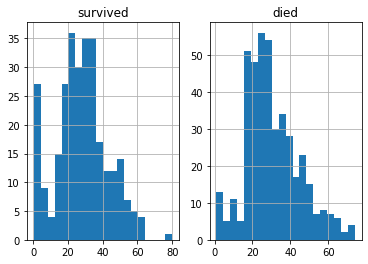

In [4]:
plt.subplot(1,2,1) # a rows and b columns and the cth plot from that
hist_sur = df_train[df_train.Survived == 1]['Age']
hist_sur.hist(bins=20)
plt.title('survived')
plt.subplot(1,2,2)
hist_not = df_train[df_train.Survived == 0]['Age']
hist_not.hist(bins=20)
plt.title('died')

### Survival by Gender
- Females where far more likely to survive on the titanic 

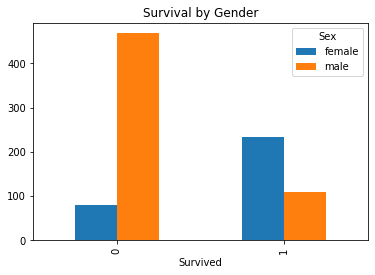

In [6]:
table = df_train[['Sex','Survived','PassengerId']].groupby(['Survived','Sex'])['PassengerId'].count().unstack()
table1 = table.plot.bar()
plt.title('Survival by Gender')
plt.savefig("plots/Sur_sex.png")

### Survival by Pclass
- First class passengers were more likely to survive, while 3rd class passengers where more likely to die

Text(0.5, 1.0, 'Survival by Pclass')

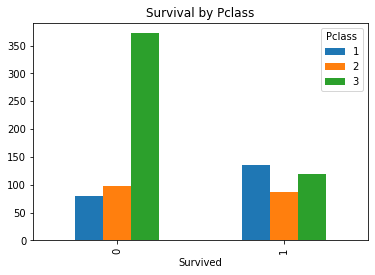

In [7]:
table2 = df_train[['Pclass','Survived','PassengerId']].groupby(['Survived','Pclass'])['PassengerId'].count().unstack()
table3 = table2.plot.bar()
plt.title('Survival by Pclass')

### Survival by Fare
- As seen earlier, first class passengers are more likely to have survived
- We also see that there is limited correlaction between the fare paid and the Pclass travelled for 2nd and 3rd class passengers, meaning 3rd class passengers for the titanic were being ripped off

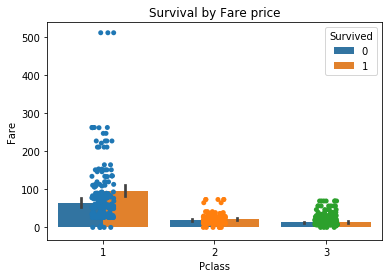

In [8]:
ax1 = sns.barplot(x="Pclass", y="Fare", 
                data=df_train, hue="Survived")
ax1 = sns.stripplot(x="Pclass", y="Fare",
                   data=df_train, jitter=True,
                   edgecolor="gray")
plt.title("Survival by Fare price",fontsize=12);

## Multi feature visualisation
### Survival by Port of Embarkation
- 3rd class passengers who embarked in Southhampton had the highest change of death on the titanic

/Users/sabrinafruhauf/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Survival by Pclass and port of embarkation <seaborn.axisgrid.FacetGrid object at 0x1a22bbeb90>


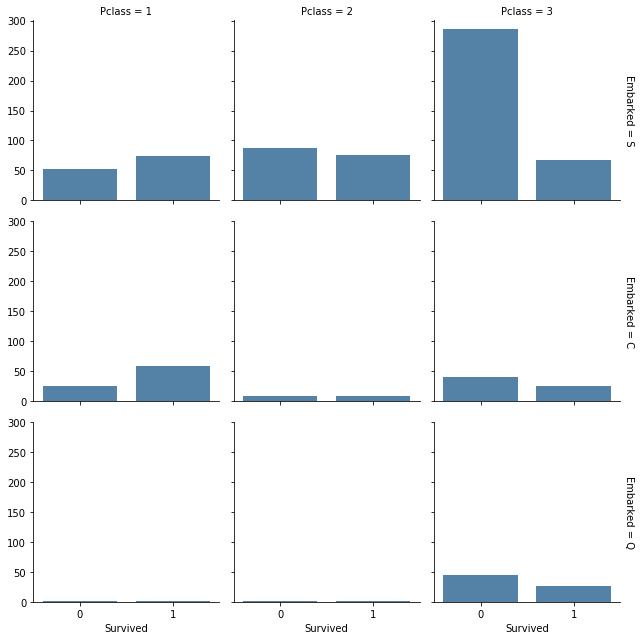

In [9]:
ax2 = sns.FacetGrid(df_train, row="Embarked", col="Pclass", margin_titles=True)
ax2.map(sns.countplot,'Survived', color="steelblue")
ax2.savefig("plots/Sur_port_Age.png")
print('Survival by Pclass and port of embarkation', ax2)

### Gender/ Survival split by age and Pclass
- Plot shows, that the older the passenger, the less chance of survival he or she had
- 2nd class males show a high mortality rate inspite of age, while most 2nd class females seem to have survived

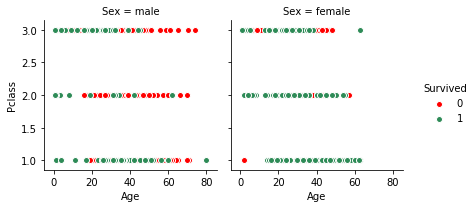

In [10]:
grid = sns.FacetGrid(df_train, hue="Survived", col="Sex", margin_titles=True,
                  palette={1:"seagreen", 0:"red"})
grid = grid.map(plt.scatter, "Age", "Pclass",edgecolor="w").add_legend();

### Feature correlation to decide on usage in the model
- Looking at the row/column 'Survived', highest correclation with 'Pclass', 'Fare', 'Parch' and 'age'
- thus these will be used to train the model
- Sex is not yet a numerical value, so cannot be checked

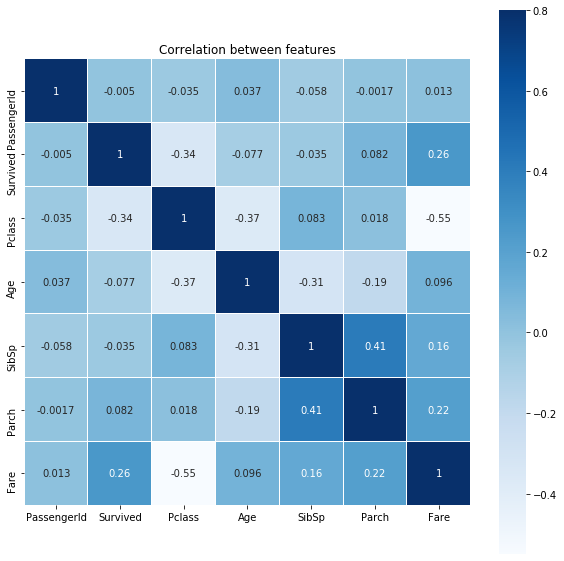

In [11]:
corr=df_train.corr() #["Survived"]
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='Blues',linecolor="white")
plt.title('Correlation between features');

In [12]:
df_train.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64